# River / Non river Assignment 5 

### Roll no: MIT2018020

1. Using Naive Bayesian classifier predict river non river using Satellite data set of Hooghly river (unstructured data set).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
import pathlib
import imageio
import numpy as np

In [3]:
feature_paths = pathlib.Path('./river/images/').glob('*.gif')
label_path = pathlib.Path('./river/images/label.jpeg')
feature_sorted = sorted([x for x in feature_paths]) 
feature_sorted.append(label_path)

In [4]:
#im = imageio.imread(str(training_sorted))
str(feature_paths), feature_sorted

('<generator object Path.glob at 0x7f07ad8e84f8>',
 [PosixPath('river/images/1.gif'),
  PosixPath('river/images/2.gif'),
  PosixPath('river/images/3.gif'),
  PosixPath('river/images/4.gif'),
  PosixPath('river/images/label.jpeg')])

In [6]:
img = []
for i in range(5):
    im_path = feature_sorted[i]
    im = imageio.imread(str(im_path))
    img.append(np.array(im.reshape(-1)))

In [7]:
np.random.seed(3)
data = pd.DataFrame(np.array(img).T,).sample(frac=1).reset_index(drop=True)
data = data.rename(index=str, columns={0:'Rband', 1:'Gband', 2:'Bband', 3:'Iband', 4:'Label'})
data.head()

,Rband,Gband,Bband,Iband,Label
0,40,25,26,35,0
1,38,23,23,43,0
2,39,25,26,35,0
3,38,23,23,28,0
4,42,26,29,38,0


In [8]:
x = data.iloc[:,:4]
y = data.iloc[:,4] > 120

50 River class and 100 Non River Class

In [9]:
loc = np.append(np.where(y == True)[0][:50], np.where(y == False)[0][:100])
x_train = x.iloc[loc]
y_train = y.iloc[loc] 

## Training

In [10]:
def train(x,y, alpha=1):
    vocab = {'Rband':[],'Gband':[],'Bband':[],'Iband':[]}
    freq_river = {'Rband':{},'Gband':{},'Bband':{},'Iband':{}}
    freq_nonriver = {'Rband':{},'Gband':{},'Bband':{},'Iband':{}}
    
    for i in ['Rband','Gband','Bband','Iband']:
        for j in range(150):
            if x[i][j] not in vocab[i]:
                vocab[i].append(x[i][j])
                freq_river[i][x[i][j]] = 0
                freq_nonriver[i][x[i][j]] = 0
            if y[j] == True:
                freq_river[i][x[i][j]] += 1
            else:
                freq_nonriver[i][x[i][j]] += 1
    freq = {'river':freq_river, 'nonriver': freq_nonriver}
    
    return freq, vocab

In [11]:
freq, vocab = train(x_train, y_train)
freq

{'river': {'Rband': {46: 1,
   43: 17,
   44: 19,
   45: 13,
   40: 0,
   38: 0,
   39: 0,
   42: 0,
   37: 0,
   35: 0,
   41: 0,
   47: 0,
   48: 0,
   51: 0,
   36: 0},
  'Gband': {32: 2,
   29: 12,
   30: 24,
   31: 10,
   28: 2,
   25: 0,
   23: 0,
   26: 0,
   24: 0,
   27: 0,
   21: 0,
   34: 0,
   36: 0},
  'Bband': {33: 1,
   31: 27,
   32: 15,
   30: 5,
   29: 2,
   26: 0,
   23: 0,
   24: 0,
   25: 0,
   22: 0,
   27: 0,
   20: 0,
   28: 0,
   34: 0,
   41: 0,
   37: 0,
   21: 0,
   36: 0},
  'Iband': {22: 12,
   20: 8,
   21: 28,
   28: 1,
   24: 1,
   35: 0,
   43: 0,
   38: 0,
   31: 0,
   37: 0,
   36: 0,
   30: 0,
   33: 0,
   32: 0,
   29: 0,
   39: 0,
   34: 0,
   26: 0,
   40: 0,
   41: 0,
   27: 0,
   46: 0,
   44: 0,
   25: 0,
   23: 0,
   42: 0}},
 'nonriver': {'Rband': {46: 2,
   43: 9,
   44: 5,
   45: 0,
   40: 19,
   38: 14,
   39: 16,
   42: 15,
   37: 3,
   35: 1,
   41: 11,
   47: 2,
   48: 1,
   51: 1,
   36: 1},
  'Gband': {32: 1,
   29: 3,
   30: 3,
   3

In [12]:
for r in x:
    print(r)

Rband
Gband
Bband
Iband


## Bayes Rule for taking the decision

### If $P(Ham | w_1) > P(Spam | w_1) $ <br> then <br>  $\;\;\;\;\;\;$ $Ham$ <br> else  <br> $\;\;\;\;\;\;$    $Spam$
### $P(Spam | w_1) = \frac{P(w_1 | Spam) x P(Spam)}{P(w_1)} $ <br>
### $P(Ham | w_1) = \frac{P(w_1 | Ham) x P(Ham)}{P(w_1)} $

Here $P(w_1) $ in denominator is common for computing both probablities, so it is not required for the decision

In [5]:
def predict_river(x, freq, vocab):
    h = []
    for j in range(x.shape[0]):
        p_river = 1/3
        p_nonriver = 2/3
        for i in ['Rband','Gband','Bband','Iband']:
            if x[i][j] in vocab[i]:
                p_river *= freq['river'][i][x[i][j]] / 50
                p_nonriver *= freq['nonriver'][i][x[i][j]] / 100            
#             else:
#                 p_river *= 1 / 51
#                 p_nonriver *= 1 / 101
        if p_river > p_nonriver:
            h.append(1)
        else:
            h.append(0)
    return np.array(h)

In [6]:
def accuracy(h, y, freq, vocab) :
    cm = confusion_matrix(y,h)
    plot_cm(cm)
    print("\nTotal non River:" + str(np.where(y == 0)[0].shape[0]))
    print("Total River:" + str(np.where(y == 1)[0].shape[0]))
    
    print("\nPredicted non River:" + str(np.where(h == 0)[0].shape[0]))
    print("Predicted River:" + str(np.where(h == 1)[0].shape[0]))
    
    error = np.abs(h - y).sum()
    return (1 - error / data.shape[0] )* 100

### Ploting Function

Ref: https://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/

In [7]:
def plot_cm(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative (Not River)','Positive (River)']
    plt.title('River or Not River Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [8]:
freq, vocab = train(x_train, y_train)


NameError: name 'train' is not defined

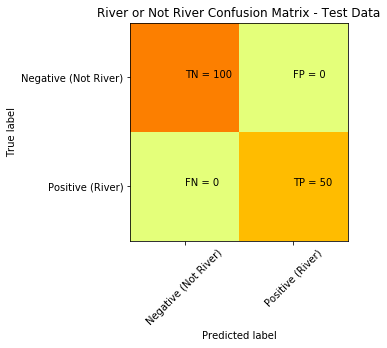


Total non River:100
Total River:50

Predicted non River:100
Predicted River:50


100.0

In [17]:
h = predict_river(x_train, freq, vocab)
accuracy(h, y_train, freq, vocab)

In [18]:
h = predict_river(x, freq, vocab)

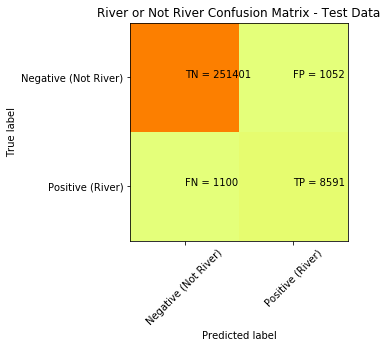


Total non River:252453
Total River:9691

Predicted non River:252501
Predicted River:9643


99.1790771484375

In [19]:
accuracy(h, y, freq, vocab)

In [20]:
x1 = pd.DataFrame(np.array(img).T,).iloc[:,:4]
x1 = x1.rename(index=str, columns={0:'Rband', 1:'Gband', 2:'Bband', 3:'Iband'})

In [21]:
pred = predict_river(x1, freq, vocab)

In [22]:
pred[np.where(pred > 0)] = 255

In [23]:
pred = pred.reshape(512,-1)

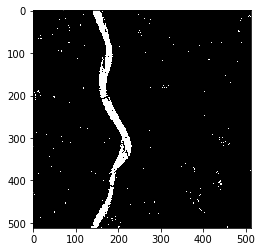

In [24]:
plt.imshow(pred, cmap='gray')